In [2]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

### Dataset reading and annotations

In [4]:
train = pd.read_csv('~/Downloads/emoHi-train.csv.zip', index_col = 0)
test = pd.read_csv('~/Downloads/emoHi-test.csv.zip', index_col=0)

In [5]:
train

,id,labels,text
0,eebbqej,[27],मेरा पसंदीदा खाना कुछ भी है जो मुझे खुद नहीं ब...
1,ed00q6i,[27],"अब अगर वह खुद से दूर हो जाता है, तो हर कोई सोच..."
2,eezlygj,[2],बकवास बेअदब आईएसओिंग क्यों है?
3,ed7ypvh,[14],उसे खतरा महसूस कराने के लिए
4,ed0bdzj,[3],डर्टी सदर्न वेंकर्स
...,...,...,...
43405,edsb738,[18],आपको अच्छी तरह से जोड़ा गया मुझे अभी धनुष मिला...
43406,ee7fdou,[6],हमेशा सोचा कि यह मजाकिया था लेकिन क्या यह किसी...
43407,efgbhks,[3],तुम्हारी किस बारे में बोलने की इच्छा थी? जो कु...
43408,ed1naf8,[13],"एक बपतिस्मा की तरह, सेक्सी परिणामों के साथ!"


In [6]:
train['labels'] = train['labels'].str.replace(r'[', '')
train['labels'] = train['labels'].str.replace(r']', '')
train['labels'] = train['labels'].str.strip()

/var/folders/t_/jx0zym4j5mgf__cxw2drjvwm0000gn/T/ipykernel_15580/3604601887.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['labels'] = train['labels'].str.replace(r'[', '')
/var/folders/t_/jx0zym4j5mgf__cxw2drjvwm0000gn/T/ipykernel_15580/3604601887.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['labels'] = train['labels'].str.replace(r']', '')


In [7]:
test['labels'] = test['labels'].str.replace(r'[', '')
test['labels'] = test['labels'].str.replace(r']', '')
test['labels'] = test['labels'].str.strip()

/var/folders/t_/jx0zym4j5mgf__cxw2drjvwm0000gn/T/ipykernel_15580/43894735.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['labels'] = test['labels'].str.replace(r'[', '')
/var/folders/t_/jx0zym4j5mgf__cxw2drjvwm0000gn/T/ipykernel_15580/43894735.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['labels'] = test['labels'].str.replace(r']', '')


In [8]:
train['label'] = train['labels'].str.split(' ',expand=True)[0].astype(int)
test['label'] = test['labels'].str.split(' ',expand=True)[0].astype(int)

### Convert to TF Dataset and Train/Test Split

In [9]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(train['text'].values, tf.string),
            tf.cast(train['label'].values, tf.int32)
        )
    )
)

2022-05-04 07:41:25.857565: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(test['text'].values, tf.string),
            tf.cast(test['label'].values, tf.int32)
        )
    )
)

In [11]:
batch_size = 16

In [12]:
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

### Preprocessing
* Tokenisation
* Punctuation Removal
* Embed words to ints

In [13]:
max_features = 10000
sequence_length = 100

vectorize_layer = layers.TextVectorization(
    standardize="strip_punctuation",
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [14]:
train_text = train_dataset.map(lambda x, y: x)

In [15]:
vectorize_layer.adapt(train_text)

In [16]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [17]:
text_batch, label_batch = next(iter(train_dataset))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", first_label)
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'\xe0\xa4\xae\xe0\xa5\x87\xe0\xa4\xb0\xe0\xa4\xbe \xe0\xa4\xaa\xe0\xa4\xb8\xe0\xa4\x82\xe0\xa4\xa6\xe0\xa5\x80\xe0\xa4\xa6\xe0\xa4\xbe \xe0\xa4\x96\xe0\xa4\xbe\xe0\xa4\xa8\xe0\xa4\xbe \xe0\xa4\x95\xe0\xa5\x81\xe0\xa4\x9b \xe0\xa4\xad\xe0\xa5\x80 \xe0\xa4\xb9\xe0\xa5\x88 \xe0\xa4\x9c\xe0\xa5\x8b \xe0\xa4\xae\xe0\xa5\x81\xe0\xa4\x9d\xe0\xa5\x87 \xe0\xa4\x96\xe0\xa5\x81\xe0\xa4\xa6 \xe0\xa4\xa8\xe0\xa4\xb9\xe0\xa5\x80\xe0\xa4\x82 \xe0\xa4\xac\xe0\xa4\xa8\xe0\xa4\xbe\xe0\xa4\xa8\xe0\xa4\xbe \xe0\xa4\xb9\xe0\xa5\x88\xe0\xa5\xa4', shape=(), dtype=string)
Label tf.Tensor(27, shape=(), dtype=int32)
Vectorized review (<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[ 82, 279, 682,  35,  21,   2,  41,  12, 209,   5, 890,   7,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   

In [18]:
train_ds = train_dataset.map(vectorize_text)
val_ds = test_dataset.map(vectorize_text)

In [19]:
embedding_dim = 64

### Model definition

In [20]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(28, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 28)                1820      
                                                                 
Total params: 641,884
Trainable params: 641,884
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.SparseCategoricalAccuracy())

In [22]:
epochs = 12
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/12
2714/2714 [==============================] - 10s 3ms/step - loss: 2.7119 - sparse_categorical_accuracy: 0.2949 - val_loss: 2.6516 - val_sparse_categorical_accuracy: 0.2959
Epoch 2/12
2714/2714 [==============================] - 9s 3ms/step - loss: 2.5909 - sparse_categorical_accuracy: 0.3055 - val_loss: 2.5128 - val_sparse_categorical_accuracy: 0.3343
Epoch 3/12
2714/2714 [==============================] - 9s 3ms/step - loss: 2.4319 - sparse_categorical_accuracy: 0.3569 - val_loss: 2.3619 - val_sparse_categorical_accuracy: 0.3765
Epoch 4/12
2714/2714 [==============================] - 10s 4ms/step - loss: 2.2818 - sparse_categorical_accuracy: 0.3902 - val_loss: 2.2417 - val_sparse_categorical_accuracy: 0.3995
Epoch 5/12
2714/2714 [==============================] - 12s 4ms/step - loss: 2.1529 - sparse_categorical_accuracy: 0.4146 - val_loss: 2.1448 - val_sparse_categorical_accuracy: 0.4231
Epoch 6/12
2714/2714 [==============================] - 11s 4ms/step - loss: 2.0408 - s

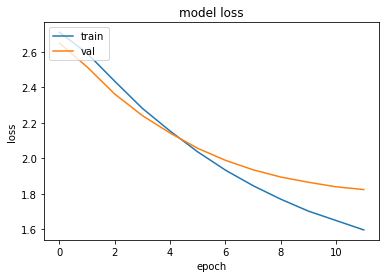

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
val_softmax = model.predict(val_ds)

In [24]:
val_labels = np.argmax(val_softmax, axis=1)

In [25]:
val_pd = test

In [26]:
val_pd['pred_labels'] = val_labels

In [27]:
val_pd

,id,labels,text,label,pred_labels
0,eecwqtt,25,मुझे आपकी स्थिति के लिए वास्तव में खेद है :( ह...,25,18
1,ed5f85d,0,यह अद्भुत है क्योंकि यह भयानक है। पर साथ नहीं।,0,0
2,een27c3,13,"किंग्स फैन यहाँ, आप लोगों को शुभकामनाएँ! देखने...",13,13
3,eelgwd1,15,"मुझे यह नहीं पता था, आज मुझे कुछ सिखाने के लिए...",15,15
4,eem5uti,27,वे हज़ारों वर्षों तक भूतिया धरती से ऊब चुके थे...,27,27
...,...,...,...,...,...
5422,efeeasc,15,धन्यवाद। मुझे अस्पताल में भर्ती होने के बाद भी...,15,15
5423,ef9c7s3,4,अच्छा यह समझ में आता है।,4,0
5424,efbiugo,27,डैडी मुद्दे [NAME],27,27
5425,efbvgp9,0,बहुत खुशी है कि मैंने कुछ महीने पहले उस सब्रेड...,0,0


In [28]:
val_pd['pred_labels'].value_counts()

27    2753
0      473
15     303
1      220
18     214
7      207
4      183
3      146
2      139
10     112
17     102
6       88
20      84
26      64
25      58
24      57
14      55
5       53
8       34
13      28
11      25
9       20
22       9
Name: pred_labels, dtype: int64

In [29]:
val_pd['label'].value_counts()

27    1606
0      504
4      318
15     288
3      286
1      252
7      233
10     220
2      197
18     169
6      139
9      127
20     120
17     116
5      114
22     109
25     108
26      92
13      84
11      84
14      74
8       74
24      46
12      30
19      16
21       8
23       7
16       6
Name: label, dtype: int64

In [30]:
from sklearn.metrics import classification_report

In [31]:
print (classification_report(val_pd['label'], val_pd['pred_labels']))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       504
           1       0.70      0.62      0.66       252
           2       0.42      0.30      0.35       197
           3       0.20      0.10      0.13       286
           4       0.33      0.19      0.24       318
           5       0.38      0.18      0.24       114
           6       0.36      0.23      0.28       139
           7       0.35      0.31      0.33       233
           8       0.44      0.20      0.28        74
           9       0.15      0.02      0.04       127
          10       0.28      0.14      0.19       220
          11       0.56      0.17      0.26        84
          12       0.00      0.00      0.00        30
          13       0.57      0.19      0.29        84
          14       0.58      0.43      0.50        74
          15       0.78      0.82      0.80       288
          16       0.00      0.00      0.00         6
          17       0.52    

/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LSTM

In [50]:
model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim, mask_zero=True),
    layers.LSTM(32),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(28, activation='softmax')
])

In [51]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.SparseCategoricalAccuracy())

In [52]:
epochs = 4
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/4
2714/2714 [==============================] - 100s 36ms/step - loss: 2.3578 - sparse_categorical_accuracy: 0.3865 - val_loss: 2.0823 - val_sparse_categorical_accuracy: 0.4456
Epoch 2/4
2714/2714 [==============================] - 95s 35ms/step - loss: 1.9123 - sparse_categorical_accuracy: 0.4708 - val_loss: 1.9336 - val_sparse_categorical_accuracy: 0.4678
Epoch 3/4
2714/2714 [==============================] - 94s 35ms/step - loss: 1.6883 - sparse_categorical_accuracy: 0.5140 - val_loss: 1.9003 - val_sparse_categorical_accuracy: 0.4772
Epoch 4/4
2714/2714 [==============================] - 102s 38ms/step - loss: 1.5143 - sparse_categorical_accuracy: 0.5573 - val_loss: 1.9203 - val_sparse_categorical_accuracy: 0.4721


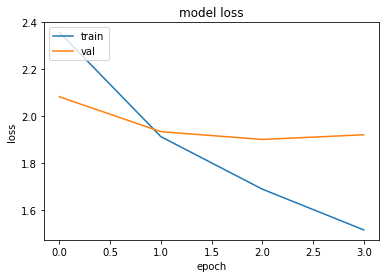

In [53]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
val_softmax = model.predict(val_ds)

In [55]:
val_labels = np.argmax(val_softmax, axis=1)

In [56]:
val_pd = test

In [57]:
val_pd['pred_labels'] = val_labels

In [58]:
val_pd

,id,labels,text,label,pred_labels
0,eecwqtt,25,मुझे आपकी स्थिति के लिए वास्तव में खेद है :( ह...,25,24
1,ed5f85d,0,यह अद्भुत है क्योंकि यह भयानक है। पर साथ नहीं।,0,0
2,een27c3,13,"किंग्स फैन यहाँ, आप लोगों को शुभकामनाएँ! देखने...",13,20
3,eelgwd1,15,"मुझे यह नहीं पता था, आज मुझे कुछ सिखाने के लिए...",15,15
4,eem5uti,27,वे हज़ारों वर्षों तक भूतिया धरती से ऊब चुके थे...,27,27
...,...,...,...,...,...
5422,efeeasc,15,धन्यवाद। मुझे अस्पताल में भर्ती होने के बाद भी...,15,15
5423,ef9c7s3,4,अच्छा यह समझ में आता है।,4,0
5424,efbiugo,27,डैडी मुद्दे [NAME],27,27
5425,efbvgp9,0,बहुत खुशी है कि मैंने कुछ महीने पहले उस सब्रेड...,0,17


In [59]:
val_pd['pred_labels'].value_counts()

27    2095
0      436
15     301
7      258
1      252
18     235
10     222
3      212
2      181
4      155
17     149
25     114
26     100
11      93
6       93
14      91
20      89
5       89
24      78
9       75
13      56
8       35
22      11
12       7
Name: pred_labels, dtype: int64

In [60]:
print (classification_report(val_pd['label'], val_pd['pred_labels']))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       504
           1       0.68      0.68      0.68       252
           2       0.34      0.31      0.33       197
           3       0.19      0.14      0.16       286
           4       0.35      0.17      0.23       318
           5       0.28      0.22      0.25       114
           6       0.31      0.21      0.25       139
           7       0.34      0.37      0.35       233
           8       0.43      0.20      0.28        74
           9       0.17      0.10      0.13       127
          10       0.23      0.24      0.24       220
          11       0.24      0.26      0.25        84
          12       0.43      0.10      0.16        30
          13       0.43      0.29      0.34        84
          14       0.45      0.55      0.50        74
          15       0.78      0.82      0.80       288
          16       0.00      0.00      0.00         6
          17       0.36    

/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bi-LSTM

In [61]:
model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim, mask_zero=True),
    layers.Bidirectional(tf.keras.layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dense(28, activation='softmax')
])

In [62]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.SparseCategoricalAccuracy())

In [63]:
epochs = 2
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/2
2714/2714 [==============================] - 129s 46ms/step - loss: 2.2287 - sparse_categorical_accuracy: 0.4101 - val_loss: 1.8962 - val_sparse_categorical_accuracy: 0.4872
Epoch 2/2
2714/2714 [==============================] - 131s 48ms/step - loss: 1.7027 - sparse_categorical_accuracy: 0.5187 - val_loss: 1.8018 - val_sparse_categorical_accuracy: 0.5001


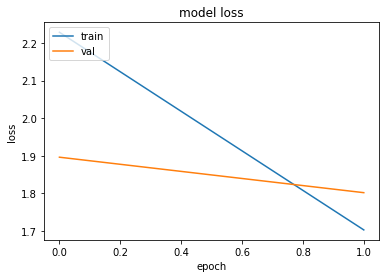

In [64]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [65]:
val_softmax = model.predict(val_ds)

In [66]:
val_labels = np.argmax(val_softmax, axis=1)

In [67]:
val_pd = test

In [68]:
val_pd['pred_labels'] = val_labels

In [69]:
val_pd

,id,labels,text,label,pred_labels
0,eecwqtt,25,मुझे आपकी स्थिति के लिए वास्तव में खेद है :( ह...,25,24
1,ed5f85d,0,यह अद्भुत है क्योंकि यह भयानक है। पर साथ नहीं।,0,0
2,een27c3,13,"किंग्स फैन यहाँ, आप लोगों को शुभकामनाएँ! देखने...",13,20
3,eelgwd1,15,"मुझे यह नहीं पता था, आज मुझे कुछ सिखाने के लिए...",15,15
4,eem5uti,27,वे हज़ारों वर्षों तक भूतिया धरती से ऊब चुके थे...,27,27
...,...,...,...,...,...
5422,efeeasc,15,धन्यवाद। मुझे अस्पताल में भर्ती होने के बाद भी...,15,15
5423,ef9c7s3,4,अच्छा यह समझ में आता है।,4,0
5424,efbiugo,27,डैडी मुद्दे [NAME],27,27
5425,efbvgp9,0,बहुत खुशी है कि मैंने कुछ महीने पहले उस सब्रेड...,0,17


In [70]:
val_pd['pred_labels'].value_counts()

27    2280
0      508
15     312
1      249
7      237
18     214
2      184
4      181
3      172
10     167
17     126
25     111
6      110
20     106
26      81
11      79
14      78
24      65
9       57
5       41
8       35
13      31
22       3
Name: pred_labels, dtype: int64

In [71]:
val_pd['label'].value_counts()

27    1606
0      504
4      318
15     288
3      286
1      252
7      233
10     220
2      197
18     169
6      139
9      127
20     120
17     116
5      114
22     109
25     108
26      92
13      84
11      84
14      74
8       74
24      46
12      30
19      16
21       8
23       7
16       6
Name: label, dtype: int64

In [72]:
print (classification_report(val_pd['label'], val_pd['pred_labels']))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       504
           1       0.67      0.66      0.66       252
           2       0.39      0.37      0.38       197
           3       0.20      0.12      0.15       286
           4       0.36      0.20      0.26       318
           5       0.39      0.14      0.21       114
           6       0.37      0.29      0.33       139
           7       0.39      0.40      0.40       233
           8       0.63      0.30      0.40        74
           9       0.14      0.06      0.09       127
          10       0.31      0.24      0.27       220
          11       0.24      0.23      0.23        84
          12       0.00      0.00      0.00        30
          13       0.29      0.11      0.16        84
          14       0.54      0.57      0.55        74
          15       0.77      0.83      0.80       288
          16       0.00      0.00      0.00         6
          17       0.43    

/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayush.garg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
history.history['loss']

[2.7118561267852783,
 2.5909008979797363,
 2.4318795204162598,
 2.2817914485931396,
 2.152872323989868,
 2.040827512741089,
 1.9336308240890503,
 1.8480844497680664,
 1.7680695056915283,
 1.7035614252090454,
 1.650164008140564,
 1.5983766317367554]

In [26]:
bert_val_loss = [1.70124209, 1.5589102, 1.508244]
bert_train_loss = [1.765632, 1.5329102, 1.358244]

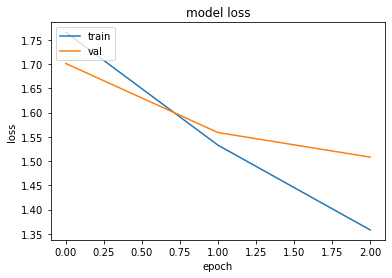

In [27]:
from matplotlib import pyplot as plt
plt.plot(bert_train_loss)
plt.plot(bert_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()